<a href="https://colab.research.google.com/github/umar-ali-k/CNN-models/blob/master/Single_unit_structure_of_Inception_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary packages

In [0]:
import keras

## Import keras dataset which is cifar10

In [0]:
from keras.datasets import cifar10

## Load the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Get x_train, x_test, y_train and y_test

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0


Get y_train and y_test as one-hot encoding 

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## Keras Funcational CNN model


In [0]:
from keras.layers import Input
input_img=Input(shape=(32,32,3))


**Now, we feed the input tensor to each of the 1x1, 3x3, 5x5 filters in the inception module.**

In [0]:
from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

In [0]:
import keras
output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

In [0]:
from keras.layers import Flatten,Dense
output=Flatten()(output)
out=Dense(10,activation='softmax')(output)
         

# Print the summary of the model

In [30]:
from keras.models import Model
model=Model(inputs=input_img,outputs=out)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 64)   256         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 64)   256         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 32, 32, 3)    0           input_3[0][0]                    
____________________________________________________________________________________________

## Compile and fit our model

In [31]:
from keras.optimizers import SGD
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.1, epochs=epochs, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/10





45000/45000 [==============================] - 26s 569us/step - loss: 1.5465 - acc: 0.4544 - val_loss: 1.3042 - val_acc: 0.5450
Epoch 2/10
45000/45000 [==============================] - 17s 370us/step - loss: 1.2154 - acc: 0.5757 - val_loss: 1.1892 - val_acc: 0.5830
Epoch 3/10
45000/45000 [==============================] - 17s 375us/step - loss: 1.0752 - acc: 0.6268 - val_loss: 1.1347 - val_acc: 0.6038
Epoch 4/10
45000/45000 [==============================] - 17s 374us/step - loss: 0.9786 - acc: 0.6630 - val_loss: 1.1128 - val_acc: 0.6214
Epoch 5/10
45000/45000 [==============================] - 17s 376us/step - loss: 0.9050 - acc: 0.6873 - val_loss: 1.0815 - val_acc: 0.6344
Epoch 6/10
45000/45000 [==============================] - 17s 377us/step - loss: 0.8408 - acc: 0.7113 - val_loss: 1.0800 - val_acc: 0.6308
Epoch 7/10
4500

# Model Visualization


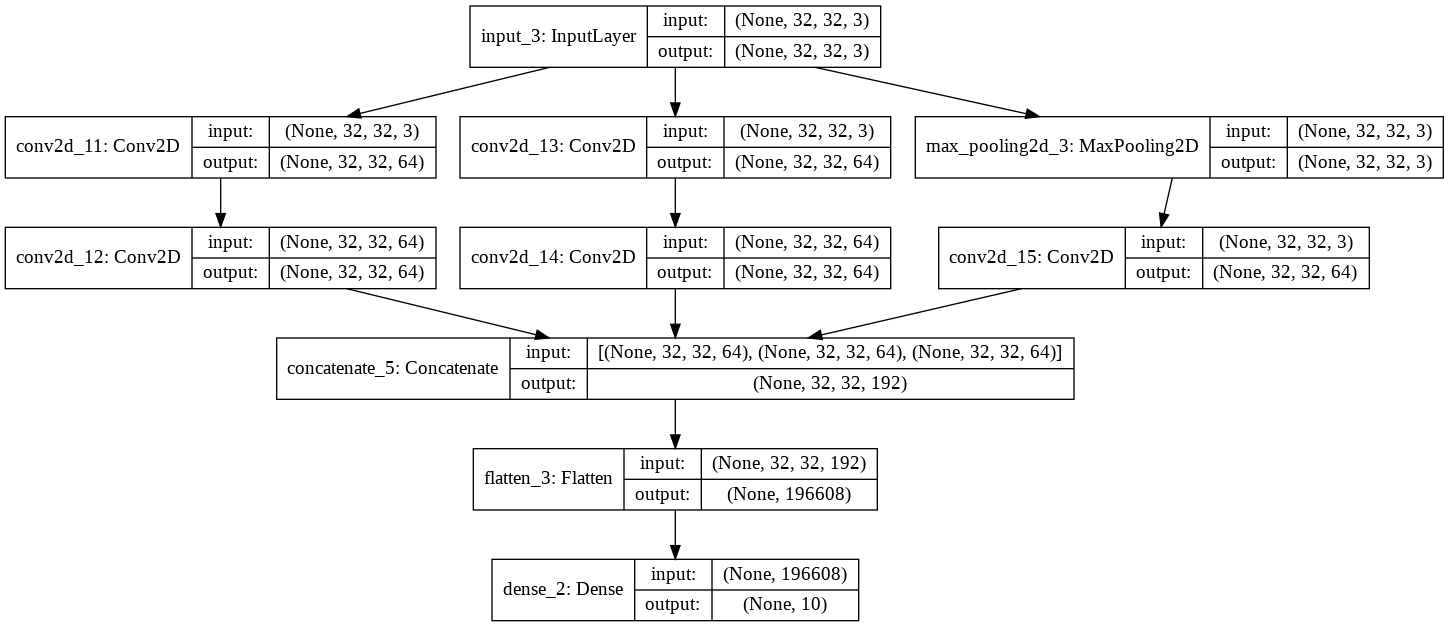

In [32]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


## Printing the accuracy of our model

In [33]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy:{0}" .format(scores[1]*100))

Accuracy:63.2
